NAME:ADREETA GUHA USC ID: 5122431956

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dfnames=pd.read_csv("constituents.csv",delimiter=',')
dfprices=pd.read_csv("prices.csv",delimiter=",")
dfprices.shape

(355, 461)

Q1 SOLUTION:

In [29]:
dfprices.iloc[:5,5]

0    137.682632
1    132.981903
2    138.152725
3    138.632599
4    142.138565
Name: ACN, dtype: float64

In [30]:
dfprices.set_index("Date",inplace=True)
dfprices.iloc[:5,:4]

,MMM,AOS,ABT,ABBV
Date,,,,
2019-01-02,181.270157,42.208401,67.791504,80.913643
2019-01-03,174.444626,41.188873,64.592140,78.247650
2019-01-04,181.621399,42.839535,66.435669,80.768547
2019-01-07,181.203720,43.606602,67.430595,81.947380
2019-01-08,181.963150,44.674679,66.621002,82.328247


In [31]:
dfnames["Sector"].value_counts()

Consumer Discretionary        75
Information Technology        64
Financials                    62
Industrials                   61
Health Care                   56
Consumer Staples              32
Real Estate                   29
Energy                        28
Utilities                     28
Materials                     22
Telecommunication Services     3
Name: Sector, dtype: int64

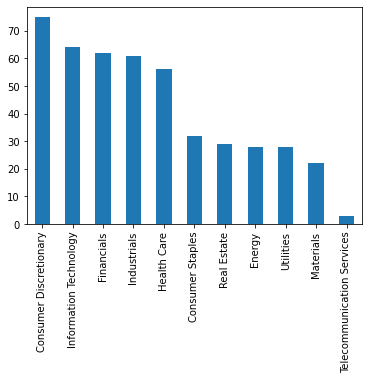

In [134]:
dfnames["Sector"].value_counts().plot(kind="bar")

Q2 SOLUTION:

In [33]:
net_returns=dfprices / dfprices.shift(1)-1
net_returns[:5]

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.037654,-0.024155,-0.047194,-0.032949,-0.034142,-0.035509,-0.032804,-0.039498,0.031218,-0.094530,...,-0.020978,-0.009674,-0.003940,-0.021858,-0.037651,-0.034280,-0.025153,-0.018088,-0.005531,-0.034564
2019-01-04,0.041141,0.040075,0.028541,0.032217,0.038884,0.039903,0.046837,0.048632,-0.024808,0.114370,...,0.027023,0.040333,0.009786,0.038598,0.046303,0.042192,0.026027,0.034153,0.030713,0.039235
2019-01-07,-0.002300,0.017906,0.014976,0.014595,0.003474,0.028196,0.014914,0.013573,0.014672,0.082632,...,0.007375,0.017758,-0.004330,0.021516,0.026415,-0.014789,-0.001093,0.000385,0.003989,0.006017
2019-01-08,0.004191,0.024493,-0.012006,0.004648,0.025290,0.030309,0.017988,0.014918,-0.006951,0.008751,...,0.006398,0.031333,0.011596,0.033030,-0.019051,0.009401,-0.001970,-0.022425,0.009114,0.014894


In [52]:
corrs=net_returns.corr()
corrs.iloc[:5,:5]

,MMM,AOS,ABT,ABBV,ACN
MMM,1.000000,0.594449,0.576961,0.452514,0.635089
AOS,0.594449,1.000000,0.453195,0.343838,0.514166
ABT,0.576961,0.453195,1.000000,0.568671,0.696058
ABBV,0.452514,0.343838,0.568671,1.000000,0.563359
ACN,0.635089,0.514166,0.696058,0.563359,1.000000


In [135]:
matrix1=corrs.values
matrix1[:5,:5]

array([[1.        , 0.59444887, 0.57696133, 0.45251417, 0.63508865],
       [0.59444887, 1.        , 0.45319516, 0.34383785, 0.51416613],
       [0.57696133, 0.45319516, 1.        , 0.56867123, 0.69605771],
       [0.45251417, 0.34383785, 0.56867123, 1.        , 0.56335942],
       [0.63508865, 0.51416613, 0.69605771, 0.56335942, 1.        ]])

Q3 SOLUTION:

In [72]:
np.amin(matrix1)

-0.17560613592975668

In [71]:
np.where(matrix1==np.amin(matrix1))

(array([179, 238], dtype=int64), array([238, 179], dtype=int64))

In [82]:
corrs.columns[179],corrs.columns[238]


('FLR', 'SJM')

Text(0, 0.5, 'SJM')

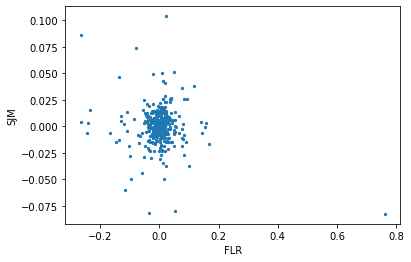

In [140]:
x=corrs.columns[179]
y=corrs.columns[238]
plt.scatter(net_returns[x],net_returns[y],s=5)
plt.xlabel(x)
plt.ylabel(y)

Q4 SOLUTION:

In [90]:
dfnames1=dfnames.sample(n=8,random_state=1)
dfnames1.iloc[:,[0,1]]

,Symbol,Name
67,BA,Boeing Company
146,ETN,Eaton Corporation
324,PKG,Packaging Corporation of America
437,VMC,Vulcan Materials
224,INCY,Incyte
283,MGM,MGM Resorts International
383,SNA,Snap-On Inc.
289,TAP,Molson Coors Brewing Company


Q5 SOLUTION:

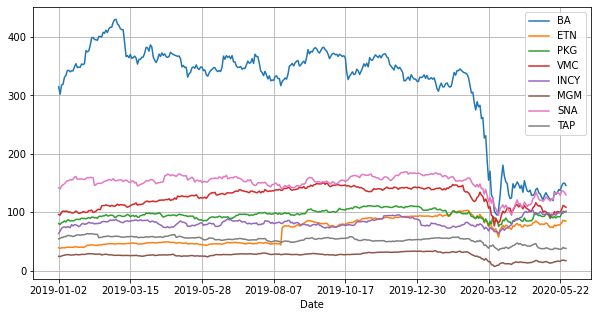

In [109]:
dfprices[dfnames1.iloc[:,0]].plot(figsize=(10,5),grid=True)

Q6 SOLUTION:

In [122]:
dfprices1=dfprices.loc[:,dfnames1["Symbol"]]
net_returns1=dfprices1/dfprices1.shift(1)-1
print("The riskiest stock is "+net_returns1.std().idxmax() +" with risk "+str(net_returns1.std().max()))

The riskiest stock is MGM with risk 0.04542699756468595


Q7 SOLUTION:

(0.0, 3.0)

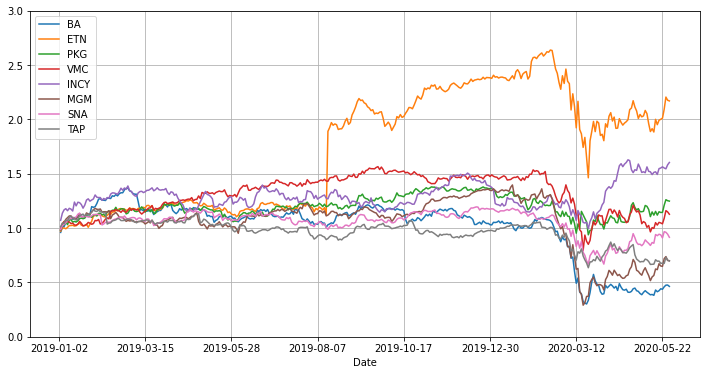

In [127]:
gross_returns=dfprices1/dfprices1.shift(1)
cum_gross_returns=gross_returns.cumprod()
cum_gross_returns.plot(figsize=(12,6),grid=True)
plt.ylim(0,3)


ETN had the largest price increase

Q8 SOLUTION:

In [132]:
avg=np.exp(np.log(gross_returns).mean())
avg

BA      0.997830
ETN     1.002191
PKG     1.000626
VMC     1.000339
INCY    1.001335
MGM     0.998992
SNA     0.999750
TAP     0.998984
dtype: float64

In [133]:
print("{} had the largest average return".format(avg.idxmax()))

ETN had the largest average return
